Decision Tree-Income Prediction

In this case study,we buid a decision tree to predict the income of a given population .The attributes are age,working class type,marital status,gender etc

In the following section,we will
1.Clean and prepare the data
2.Build adecision tree with default hyperparameters
3.Understand the hyperparameters 
4.Choose the  optimal hyperparameters using grid search cross validation

**bold text**

Understanding and cleaning the data

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#To ignaore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Reading the csv file and putting it into df object
df=pd.read_csv("/content/adult.csv.zip")

In [8]:
#lets understand the type of values in each column of our dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
# lets understand the data,how it look like
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


you can observe that columns workclass and occupation consist of missing values which are represented a ? in the data frame
On looking a bit more closely,ypu will also findthat whenever workclss is having a missing value,occupation is als missing in that row.Let's check how many rows are missing

In [12]:
# rows with issing values represented as ?
df_1=df[df.workclass =='?']
df_1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2799 entries, 4 to 48823
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              2799 non-null   int64 
 1   workclass        2799 non-null   object
 2   fnlwgt           2799 non-null   int64 
 3   education        2799 non-null   object
 4   educational-num  2799 non-null   int64 
 5   marital-status   2799 non-null   object
 6   occupation       2799 non-null   object
 7   relationship     2799 non-null   object
 8   race             2799 non-null   object
 9   gender           2799 non-null   object
 10  capital-gain     2799 non-null   int64 
 11  capital-loss     2799 non-null   int64 
 12  hours-per-week   2799 non-null   int64 
 13  native-country   2799 non-null   object
 14  income           2799 non-null   object
dtypes: int64(6), object(9)
memory usage: 349.9+ KB


There are 2799rows with missing values .We choose to simply drop these rows

In [16]:
#dropping the rows having missing values in workclass
df=df[df['workclass'] != '?']
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Let's see whether any other columns contain a ?.Since ? is a string,we can apply this check only on the categorial clumns

In [17]:
#select all categorical variables
df_categorical=df.select_dtypes(include=['object'])

#checking whether any other columns contain ?
df_categorical.apply(lambda x:x=="?",axis=0).sum()

workclass           0
education           0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
native-country    811
income              0
dtype: int64

Thus,columns occupation and native country contain some ?.Lets get rid of them

In [29]:
#dropping the ?
df = df[df['occupation']!='?']
df = df[df['native-country']!='?']

Now we have clean data frame which is ready for model building

In [30]:
#clean dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


**Data Preparation**

In [32]:
from sklearn import preprocessing
#encode categorical variables using label encoder
# select all categorical variables
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [33]:
#apply label encoder to df_categorical

le=preprocessing.LabelEncoder()
df_categorical=df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,2,1,4,6,3,2,1,38,0
1,2,11,2,4,0,4,1,38,0
2,1,7,2,10,0,4,1,38,1
3,2,15,2,6,0,2,1,38,1
5,2,0,4,7,1,4,1,38,0


In [34]:
# concat df_categoricl with original df
df=df.drop(df_categorical.columns,axis=1)
df=pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,226802,7,0,0,40,2,1,4,6,3,2,1,38,0
1,38,89814,9,0,0,50,2,11,2,4,0,4,1,38,0
2,28,336951,12,0,0,40,1,7,2,10,0,4,1,38,1
3,44,160323,10,7688,0,40,2,15,2,6,0,2,1,38,1
5,34,198693,6,0,0,30,2,0,4,7,1,4,1,38,0


In [35]:
#look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45222 non-null  int64
 1   fnlwgt           45222 non-null  int64
 2   educational-num  45222 non-null  int64
 3   capital-gain     45222 non-null  int64
 4   capital-loss     45222 non-null  int64
 5   hours-per-week   45222 non-null  int64
 6   workclass        45222 non-null  int64
 7   education        45222 non-null  int64
 8   marital-status   45222 non-null  int64
 9   occupation       45222 non-null  int64
 10  relationship     45222 non-null  int64
 11  race             45222 non-null  int64
 12  gender           45222 non-null  int64
 13  native-country   45222 non-null  int64
 14  income           45222 non-null  int64
dtypes: int64(15)
memory usage: 5.5 MB


In [37]:
#convert target variable income to categorical
df['income']=df['income'].astype('category')

Now al the categorical variables are suitably encoded.Let's build the model

**Model Building and Evaluation**

In [38]:
#Importng train test split
from sklearn.model_selection import train_test_split

In [39]:
# putting feature variable to x
x=df.drop('income',axis=1)

In [40]:
#putting response variable to y
y=df['income']

In [41]:
#splitting the data into train nd test
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=99)
X_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country
39923,50,45961,13,6849,0,40,5,9,3,9,1,4,1,38
19651,38,348739,15,0,0,60,2,14,2,9,0,4,1,38
11260,29,198210,9,0,0,40,2,11,4,12,4,2,0,38
28311,45,217654,10,0,0,40,2,15,2,5,0,4,1,10
48075,30,204470,10,0,0,36,3,15,2,3,0,4,1,38


In [44]:
#importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

#fitting the decision treewith default hyperparameters
#max_depth which is 5 so that we can plot and read the tree
dt_default=DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
#lets check evaluation metrices of our default model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Making prediction
y_pred_default=dt_default.predict(X_test)

#Printing classification report
print(classification_report(Y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10223
           1       0.75      0.56      0.64      3344

    accuracy                           0.85     13567
   macro avg       0.81      0.75      0.77     13567
weighted avg       0.84      0.85      0.84     13567



In [49]:
#Printing confusion matrix
print(confusion_matrix(Y_test,y_pred_default))
print(accuracy_score(Y_test,y_pred_default))

[[9611  612]
 [1469 1875]]
0.8466131053291074


Plotting the Decision Tree

In [53]:
#Importing required packagesfor visualisation
from IPython.display import Image

from sklearn.tree import export_graphviz
import pydotplus, graphviz

#putting features
features=list(df.columns[1:])
features


['fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [67]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [71]:
from sklearn.externals.six import StringIO
dot_data=StringIO()
export_graphviz(dt_default, out_file=dot_data, feature_names=features, filled =True,rounded=True)

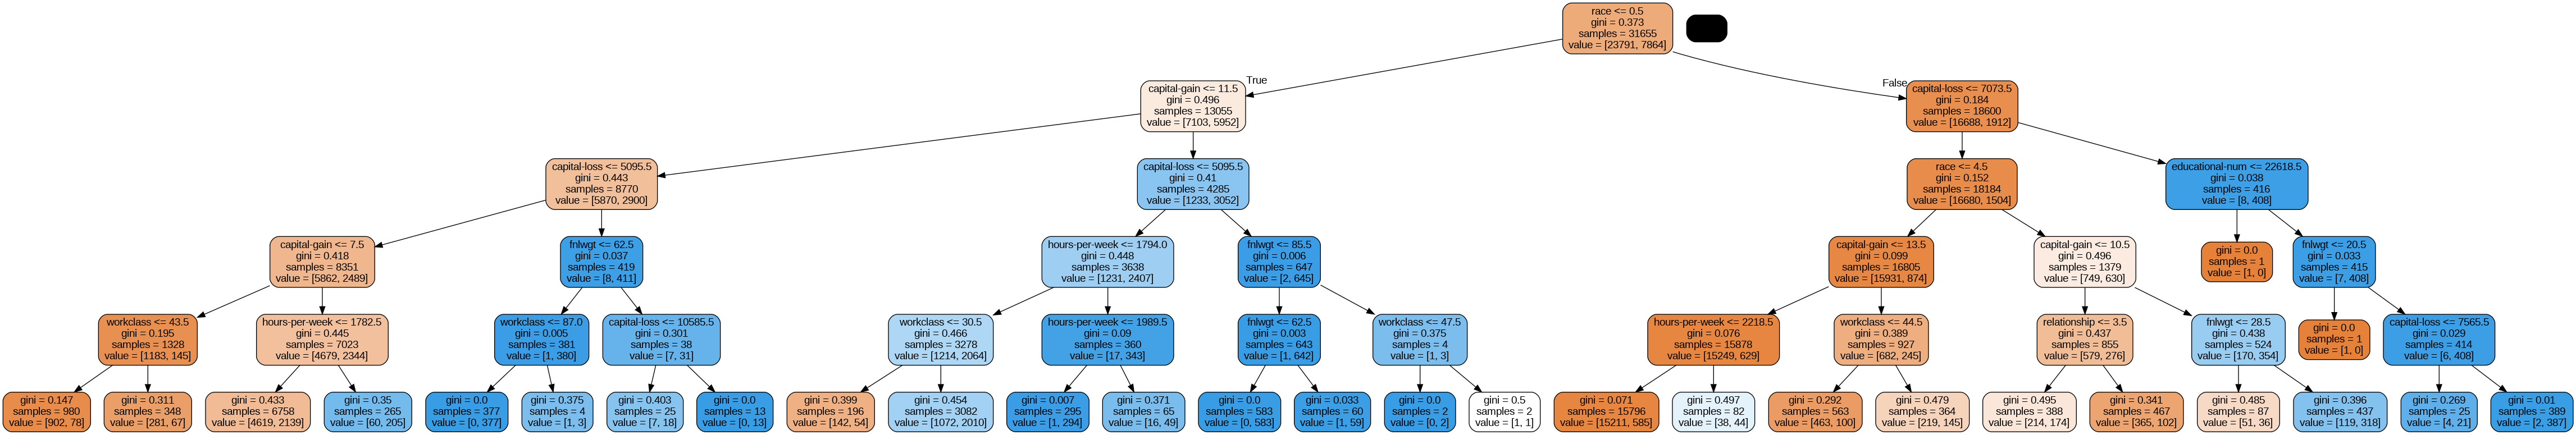

In [72]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Hyperparameter Tuing

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds=5

parameters={'max_depth':range(1,40)}

dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy")
tree.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [75]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020296,0.003829,0.003486,0.000073,1,{'max_depth': 1},0.751698,0.751540,0.751540,0.751540,0.751540,0.751572,0.000063,39
1,0.030670,0.003103,0.004050,0.000825,2,{'max_depth': 2},0.824988,0.819460,0.821671,0.821987,0.820250,0.821671,0.001898,17
2,0.039809,0.001050,0.003968,0.000400,3,{'max_depth': 3},0.835413,0.833360,0.834781,0.834781,0.833518,0.834371,0.000797,13
3,0.055618,0.003400,0.004555,0.001025,4,{'max_depth': 4},0.844732,0.840310,0.843785,0.842995,0.838888,0.842142,0.002195,10
4,0.065055,0.004178,0.005036,0.000793,5,{'max_depth': 5},0.850419,0.847102,0.847102,0.848365,0.846944,0.847986,0.001320,6


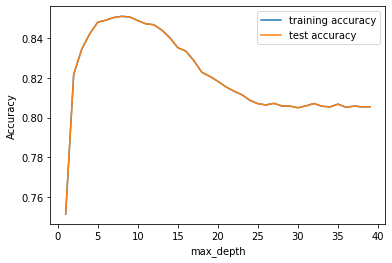

In [83]:
plt.figure
plt.plot(scores['param_max_depth'],
         scores['mean_test_score'],
         label="training accuracy")
plt.plot(scores['param_max_depth'],
         scores['mean_test_score'],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()